### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [1]:
#!pip install plotly

In [2]:
#!pip install --upgrade nbformat

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**KMeans 객체를 생성하고 군집화 수행**

In [4]:
# n_clusters : 군집화를 몇개를 할 것인가. 즉, centroid를 몇 개를 생성할 것인가이다.
# init='k-means++' : 위치를 초기화한다.
# max_iter : centroid를 최대 몇번을 할 것인지를 의미한다.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가**

In [5]:
print(kmeans.labels_)
# predict : labels속성만 반환한다.
print(kmeans.predict(irisDF))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [6]:
# cluster란 컬럼에 지정해주기 cluster란 컬럼에 지정해주기
irisDF['cluster'] = kmeans.labels_
irisDF['cluster'] = kmeans.labels_

In [7]:
irisDF['target'] = iris.target
# target이랑 cluster랑 묶어서 얼마나 매칭되는지 확인하기
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)
# target값과 cluster값은 서로 다르다. cluster는 그냥 임의의 값으로 지정해준걸로 target과 상관없다.

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


In [10]:
print(irisDF['pca_x'].shape)
print(irisDF['pca_y'].shape)

(150,)
(150,)


In [18]:
fig = px.scatter(irisDF, x='pca_x', y='pca_y', color='cluster')
fig.show()

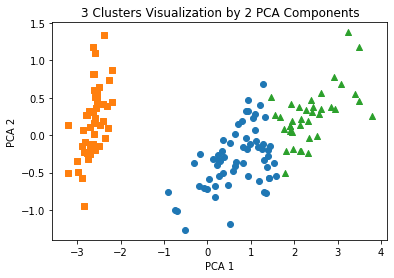

In [13]:
# cluster 값이 0, 1, 2인 경우마다 별도의 index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster 값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # 데이터를 생성할 수 있도록 해준다.
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [24]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

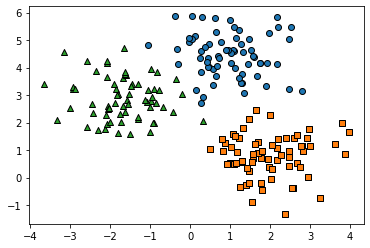

In [31]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

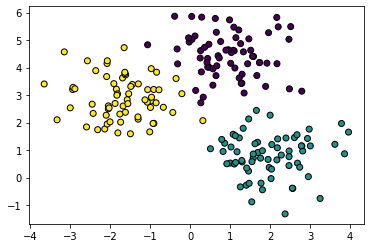

In [32]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolors='k', c=y)

**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

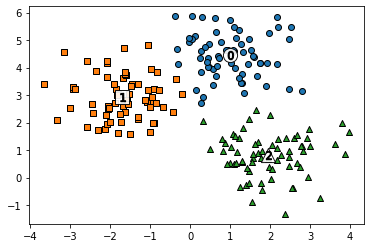

In [37]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_lables = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_lables

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels_ = np.unique(cluster_lables)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels_:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [38]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

In [39]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
